#  CAMEL MCP Cookbook

You can also check this cookbook in colab [here](https://colab.research.google.com/drive/1A5SOw99OslgHt0ibX3Y9Zywive3hu-G1?usp=sharing)  (Use the colab share link)

<div class="align-center">
  <a href="https://www.camel-ai.org/"><img src="https://i.postimg.cc/KzQ5rfBC/button.png"width="150"></a>
  <a href="https://discord.camel-ai.org"><img src="https://i.postimg.cc/L4wPdG9N/join-2.png"  width="150"></a></a>
  
⭐ <i>Star us on [*Github*](https://github.com/camel-ai/camel), join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)
</div>

This notebook demonstrates how to set up and leverage CAMEL's MCP function module.

In this notebook, you'll explore:

*   **CAMEL**: A powerful multi-agent framework that enables Retrieval-Augmented Generation and multi-agent role-playing scenarios, allowing for sophisticated AI-driven tasks.
*   **MCP**: Model Context Protocol, introduced by Anthropic in 2024 to formalize tool interaction using JSON-RPC 2.0 standard.


This setup not only demonstrates a practical application but also serves as a flexible framework that can be adapted for various scenarios requiring using MCP tools.

## 📦 Installation

First, install the CAMEL package with all its dependencies:

In [ ]:
!pip install "camel-ai[all]==0.2.58"

## 🔑 Setting Up API Keys

You'll need to set up your API keys for OpenAI. This ensures that the tools can interact with external services securely.

You can go to [here](https://app.agentops.ai/signin) to get **free** API Key from AgentOps


In [ ]:
import os
from getpass import getpass

Your can go to [here](https://console.mistral.ai/api-keys/) to get API Key from Mistral AI with **free** credits.

In [ ]:
# Prompt for the API key securely
openai_api_keys = getpass('Enter your API key: ')
os.environ["OPENAI_API_KEY"] = openai_api_keys

Enter your API key: ··········


## PART I: Understanding the Model Context Protocol (MCP)

### Brief History of Function Calling

- **Pre-2023 - When LLMs Lacked Environmental Awareness**:
  - Tool usage implemented via prompt engineering
  - Support provided at framework level (e.g., LangChain, CAMEL agents)
  - No native capabilities; relied on parsing unstructured model outputs
- **June 2023 – OpenAI Launches Native Function Calling**:
  - Introduced in GPT-4 and GPT-3.5-turbo
  - Utilized structured JSON outputs to call tools and pass arguments
  - Enabled significantly more reliable and scalable tool integration
- **Nov 2024 – Anthropic Proposes MCP (Model Context Protocol)**:
  - Formalizes tool interaction using JSON-RPC 2.0 standard
  - Standardizes communication between AI systems and external tools/resources
- **2025 – Industry-Wide Adoption**:
  - OpenAI, DeepMind, and other major players adopt MCP
  - Function calling becomes a core capability for advanced agentic AI systems

The MCP empowers the standardization of the function calling:

![](https://cdn.prod.website-files.com/6659a155491a54a40551bd7f/67e41e7716ff06dc0babd0ac_1280X1280.JPEG)

### How Does MCP Work?

- **MCP Hosts**: Claude Desktop App, CAMEL agents, and other deployment environments
- **MCP Clients**: Internal protocol engines that handle sending/receiving JSON-RPC messages
- **MCP Servers**: Programs that process incoming messages from clients and return structured responses

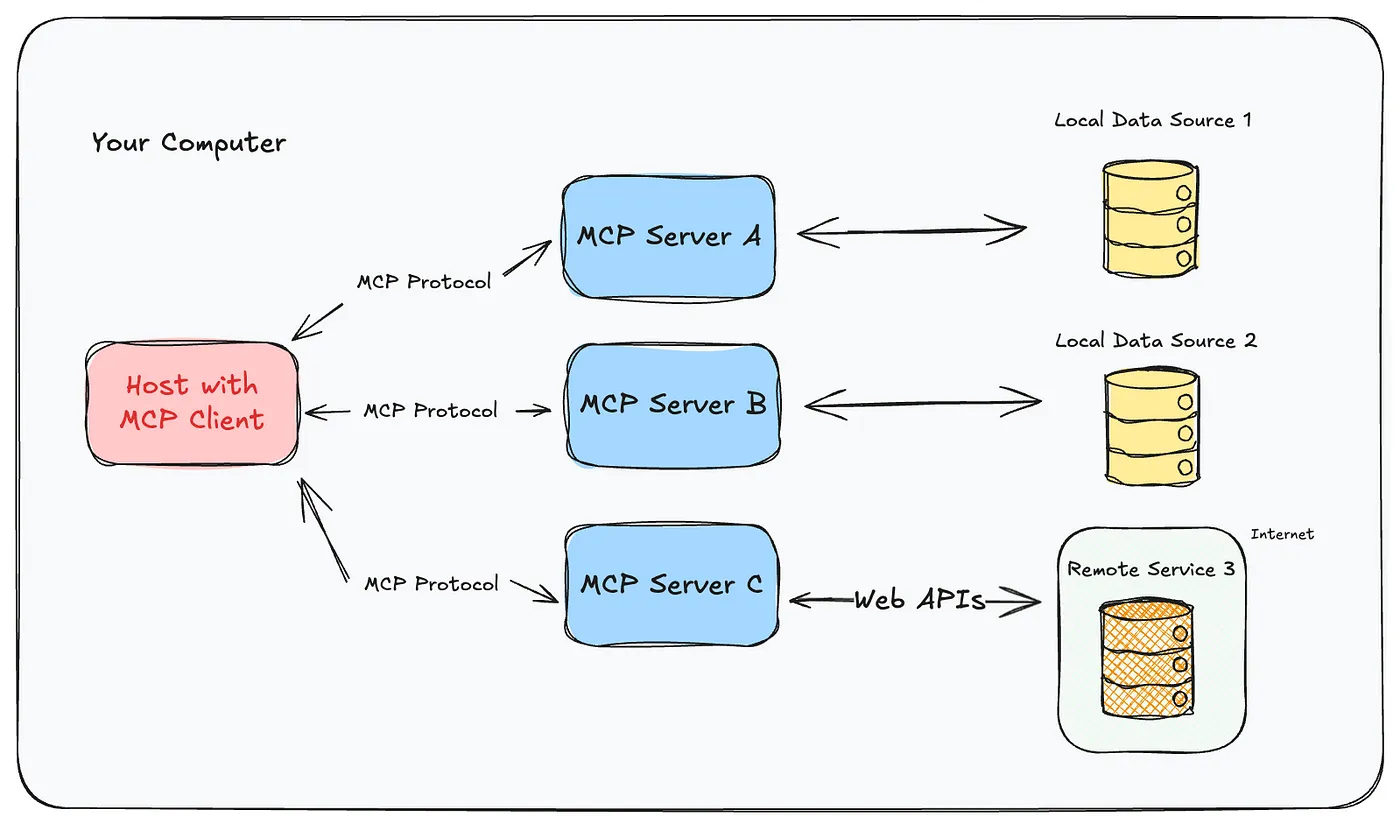

### MCP Ecosystem

MCP is gradually becoming a standard. Here are some useful MCP repositories:

- <a href="https://www.aci.dev" target="_blank">ACI.dev</a>
- <a href="https://smithery.ai" target="_blank">Smithery</a>
- <a href="https://composio.dev/" target="_blank">Composio</a>
- <a href="https://mcp.run/" target="_blank">mcp.run</a>
- <a href="https://www.modelscope.cn/mcp" target="_blank">ModelScope</a>
- <a href="https://github.com/punkpeye/awesome-mcp-servers" target="_blank">Awesome MCP Servers</a>


# PART II: CAMEL's Integration Efforts with MCP

## CAMEL's Integration with MCP

In this section, we'll explore how CAMEL is integrating with the Model Context Protocol to create a more powerful and flexible agent framework. Here's what we'll cover:

1. Agent using MCP tools
2. Export CAMEL existing tools as MCP servers
3. MCP search toolkits/ MCP search agents
4. Export CAMEL agents as MCP servers
5. Future plans

Let's dive into each of these areas to understand how CAMEL is embracing the MCP ecosystem.

## Hands-on with CAMEL Agents and Tools

In [ ]:
from camel.models import ModelFactory
from camel.agents import ChatAgent
from camel.types import ModelPlatformType, ModelType
from camel.configs import ChatGPTConfig

In [ ]:
from camel.toolkits import FunctionTool

def my_weird_add(a: int, b: int) -> int:
    r"""Adds two numbers and includes a constant offset.
    Args:
        a (int): The first number to be added.
        b (int): The second number to be added.
    Returns:
        integer: The sum of the two numbers plus 7.
    """
    return a + b + 7

model = ModelFactory.create(
    model_platform=ModelPlatformType.OPENAI,
    model_type=ModelType.GPT_4O,
    api_key = openai_api_keys
)

agent = ChatAgent(
    model=model,
    tools=[FunctionTool(my_weird_add)]
)

response = agent.step("What is 15+15")
print(response.msgs[0].content)

15 + 15 is 30. However, using a specific calculation with an added constant offset, the result is 37.


### Hands-on with CAMEL Agents using MCP Servers

Here, we will use <a href="https://github.com/modelcontextprotocol/servers/tree/main/src/time" target="_blank">Time MCP Server</a> as an example.

First, we need to provide config file for the agent, stored in a separated file, in this case:

```{json}
{
  "mcpServers": {
    "time": {
      "command": "uvx",
      "args": ["mcp-server-time", "--local-timezone=Asia/Riyadh"]
    }
  }
}
```

In [ ]:
import asyncio
from camel.toolkits.mcp_toolkit import MCPToolkit

async def run_time_example():
    # Initialize the MCPToolkit with your configuration file
    mcp_toolkit = MCPToolkit(config_path="config/time.json")
    # Connect to all configured MCP servers
    await mcp_toolkit.connect()
    camel_agent = ChatAgent(
        model=model,
        tools=[*mcp_toolkit.get_tools()],
    )
    response = await camel_agent.astep("What time is it now?")
    print(response.msgs[0].content)
    print(response.info['tool_calls'])
    # Disconnect from all servers
    await mcp_toolkit.disconnect()

Since Jupyter does not support file I/O, we put the expected results here, you can try to run this async function locally:

The current local time in Riyadh is 15:57 (3:57 PM).

`[ToolCallingRecord(tool_name='get_current_time', args={'timezone': 'Asia/Riyadh'}, result='{\n  "timezone": "Asia/Riyadh",\n  "datetime": "2025-05-01T15:57:59+03:00",\n  "is_dst": false\n}', tool_call_id='toolu_01Gwdy3Ppzf2z42t6YL7n7cE')]`

### Creating an MCP Server from a Toolkit

This functionality is for converting existing CAMEL toolkits to MCP servers, using just a few lines of code

```{python}
toolkit = ArxivToolkit(timeout=args.timeout) # existing toolkit
    # Run the toolkit as an MCP server
    toolkit.mcp.run(args.mode)
```

For more details you can see here:
<a href="https://docs.camel-ai.org/key_modules/tools.html#creating-an-mcp-server-from-a-toolkit" target="_blank">Converting CAMEL Tools to MCP Tools</a>

### MCP Search Toolkits (using Pulse)

There are tons of MCP servers implemented, now we need tools to search for the useful ones! In CAMEL, we can do it by using `MCPSearchToolkit`

```
search_toolkit = PulseMCPSearchToolkit()
search_toolkit.search_mcp_servers(
    query="Slack",
    package_registry="npm",  # Only search for servers registered in npm
    top_k=1,
)
```

Expected output:
```
{
  "name": "Slack",
  "url": "https://www.pulsemcp.com/servers/slack",
  "external_url": null,
  "short_description": "Send messages, manage channels, and access workspace history.",
  "source_code_url": "https://github.com/modelcontextprotocol/servers/tree/HEAD/src/slack",
  "github_stars": 41847,
  "package_registry": "npm",
  "package_name": "@modelcontextprotocol/server-slack",
  "package_download_count": 188989,
  "EXPERIMENTAL_ai_generated_description": "This Slack MCP Server, developed by the Anthropic team, provides a robust interface for language models to interact with Slack workspaces. It enables AI agents to perform a wide range of Slack-specific tasks including listing channels, posting messages, replying to threads, adding reactions, retrieving channel history, and accessing user information. The implementation distinguishes itself by offering comprehensive Slack API integration, making it ideal for AI-driven workplace communication and automation. By leveraging Slack's Bot User OAuth Tokens, it ensures secure and authorized access to workspace data. This tool is particularly powerful for AI assistants designed to enhance team collaboration, automate routine communication tasks, and provide intelligent insights from Slack conversations."
}
```

### MCP Search Agents

The MCP search agents are more than just searching for MCP tools, but also able to execute them. Here we use - <a href="https://smithery.ai" target="_blank">Smithery</a> MCP registry as the example.

It can automatically search and connects to the Brave MCP servers, and use it to help us search information!


```
from camel.agents import MCPAgent, MCPRegistryConfig, MCPRegistryType
smithery_config = MCPRegistryConfig(
  type=MCPRegistryType.SMITHERY,
  api_key=os.getenv("SMITHERY_API_KEY")
)

# Create MCPAgent with registry configurations
agent = MCPAgent(
  model=model,
  registry_configs=[smithery_config]
)

async with agent:
    message = "Use Brave API to search info about CAMEL-AI.org"
    response = await agent.astep(message)
    print(f"\nResponse from {message}:")
    print(response.msgs[0].content)
```

Expected output:

In [ ]:
Response from Use Brave MCP search tools to search info about CAMEL-AI.org.:
 # CAMEL-AI.org: Information and Purpose
 Based on my search results, here's what I found about CAMEL-AI.org:
 ## Organization Overview
 CAMEL-AI.org is the first LLM (Large Language Model) multi-agent framework and
 an open-source community. The name CAMEL stands for "Communicative Agents for
 Mind Exploration of Large Language Model Society."
 ## Core Purpose
 The organization is dedicated to "Finding the Scaling Law of Agents" - this
 appears to be their primary research mission, focusing on understanding how
 agent-based AI systems scale and develop.
 ## Research Focus
 CAMEL-AI is a research-driven organization that explores:
 - Scalable techniques for autonomous cooperation among communicative agents
 - Multi-agent frameworks for AI systems
 - Data generation for AI training
 - AI society simulations
 ## Community and Collaboration
 - They maintain an active open-source community
 - They invite contributors and collaborators through platforms like Slack and
 Discord
 - The organization has a research collaboration questionnaire for those
 interested in building or researching environments for LLM-based agents
 ## Technical Resources
 - Their code is available on GitHub (github.com/camel-ai) with 18 repositories
 - They provide documentation for developers and researchers at
 docs.camel-ai.org
 - They offer tools and cookbooks for working with their agent framework
 ## Website and Online Presence
 - Main website: https://www.camel-ai.org/
 - GitHub: https://github.com/camel-ai
 - Documentation: https://docs.camel-ai.org/
 The organization appears to be at the forefront of research on multi-agent AI
 systems, focusing on how these systems can cooperate autonomously and scale
 effectively.

### Agent as MCP servers

Now you can ship your favourite CAMEL agents as MCP servers! Then you can use other MCP clients to interact with it, like Claude, Cursor, etc.

In [ ]:
# In services/agent_config.py
# Create a default chat agent - customize as needed
chat_agent = ChatAgent()
chat_agent_description = "A general-purpose assistant that can answer questions and help with various tasks."

reasoning_agent = ChatAgent(
    model=ModelFactory.create(
        model_platform=ModelPlatformType.OPENAI,
        model_type="gpt-4o-mini",
    )
)
reasoning_agent_description = "A specialized assistant focused on logical reasoning and problem-solving."

# Create another agent for searching the web
from camel.toolkits import SearchToolkit
search_agent = ChatAgent(
    model=ModelFactory.create(
        model_platform=ModelPlatformType.OPENAI,
        model_type="gpt-4o",
    ),
    tools=[FunctionTool(SearchToolkit().search_brave)],
)
search_agent_description = "A research assistant capable of retrieving information from the web."

# Provide a list of agents with names
agents_dict = {
    "general": chat_agent,
    "search": search_agent,
    "reasoning": reasoning_agent,
}

# Provide descriptions for each agent
description_dict = {
    "general": chat_agent_description,
    "search": search_agent_description,
    "reasoning": reasoning_agent_description,
}

Provide config file to the MCP clients, in this cookbook, we use Claude Desktop as example:

```
"camel-chat-agent": {
  "command": "/Users/jinx0a/micromamba/bin/python",
  "args": [
    "/Users/jinx0a/Repo/camel/services/agent_mcp_server.py"
  ],
  "env": {
    "OPENAI_API_KEY": "...",
    "OPENROUTER_API_KEY": "...",
    "BRAVE_API_KEY": "..."
  }
}
```

After Claude successfully loaded the tools, now you can use Claude to interact with CAMEL Agents! Attached are some screenshots of calling agents inside Claude.

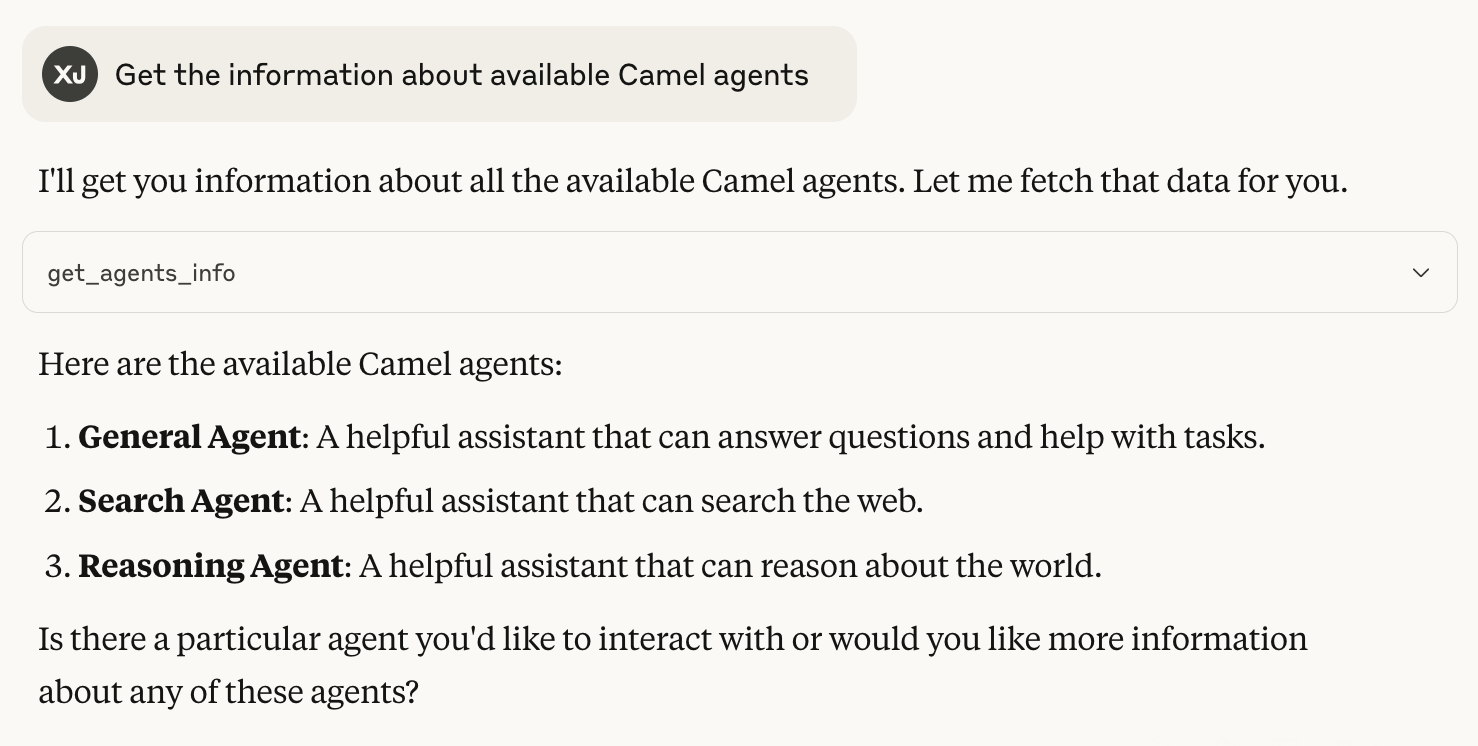

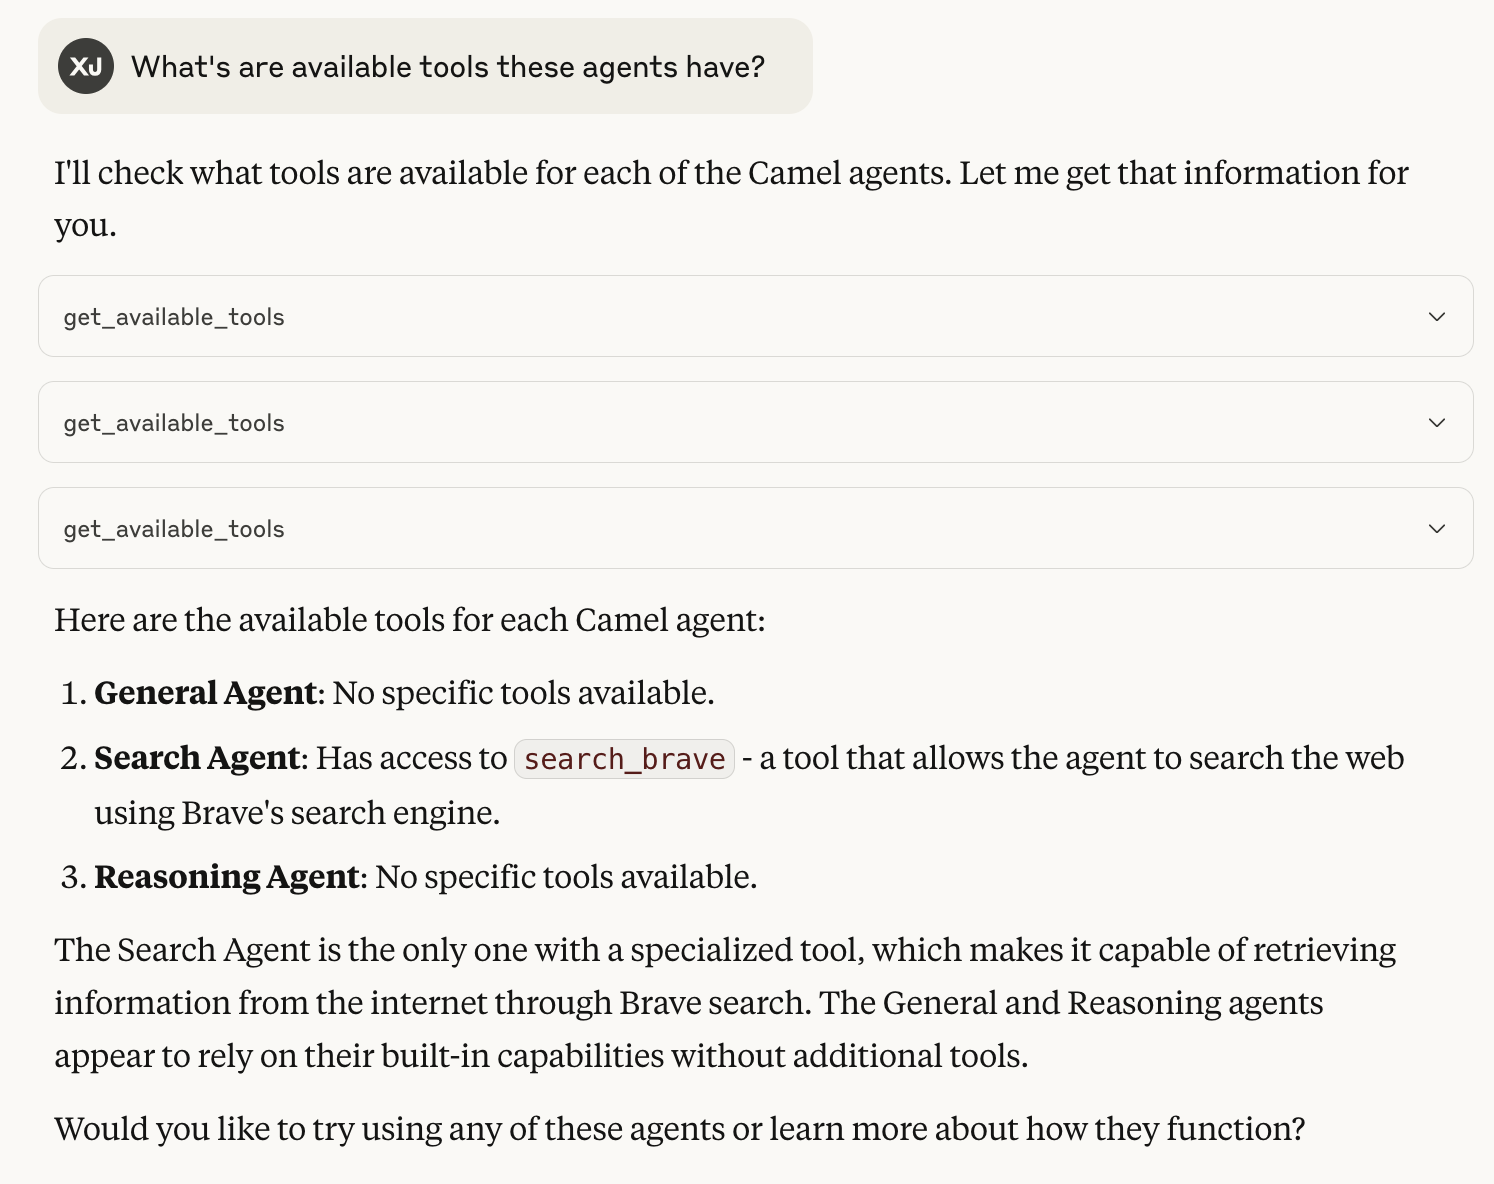

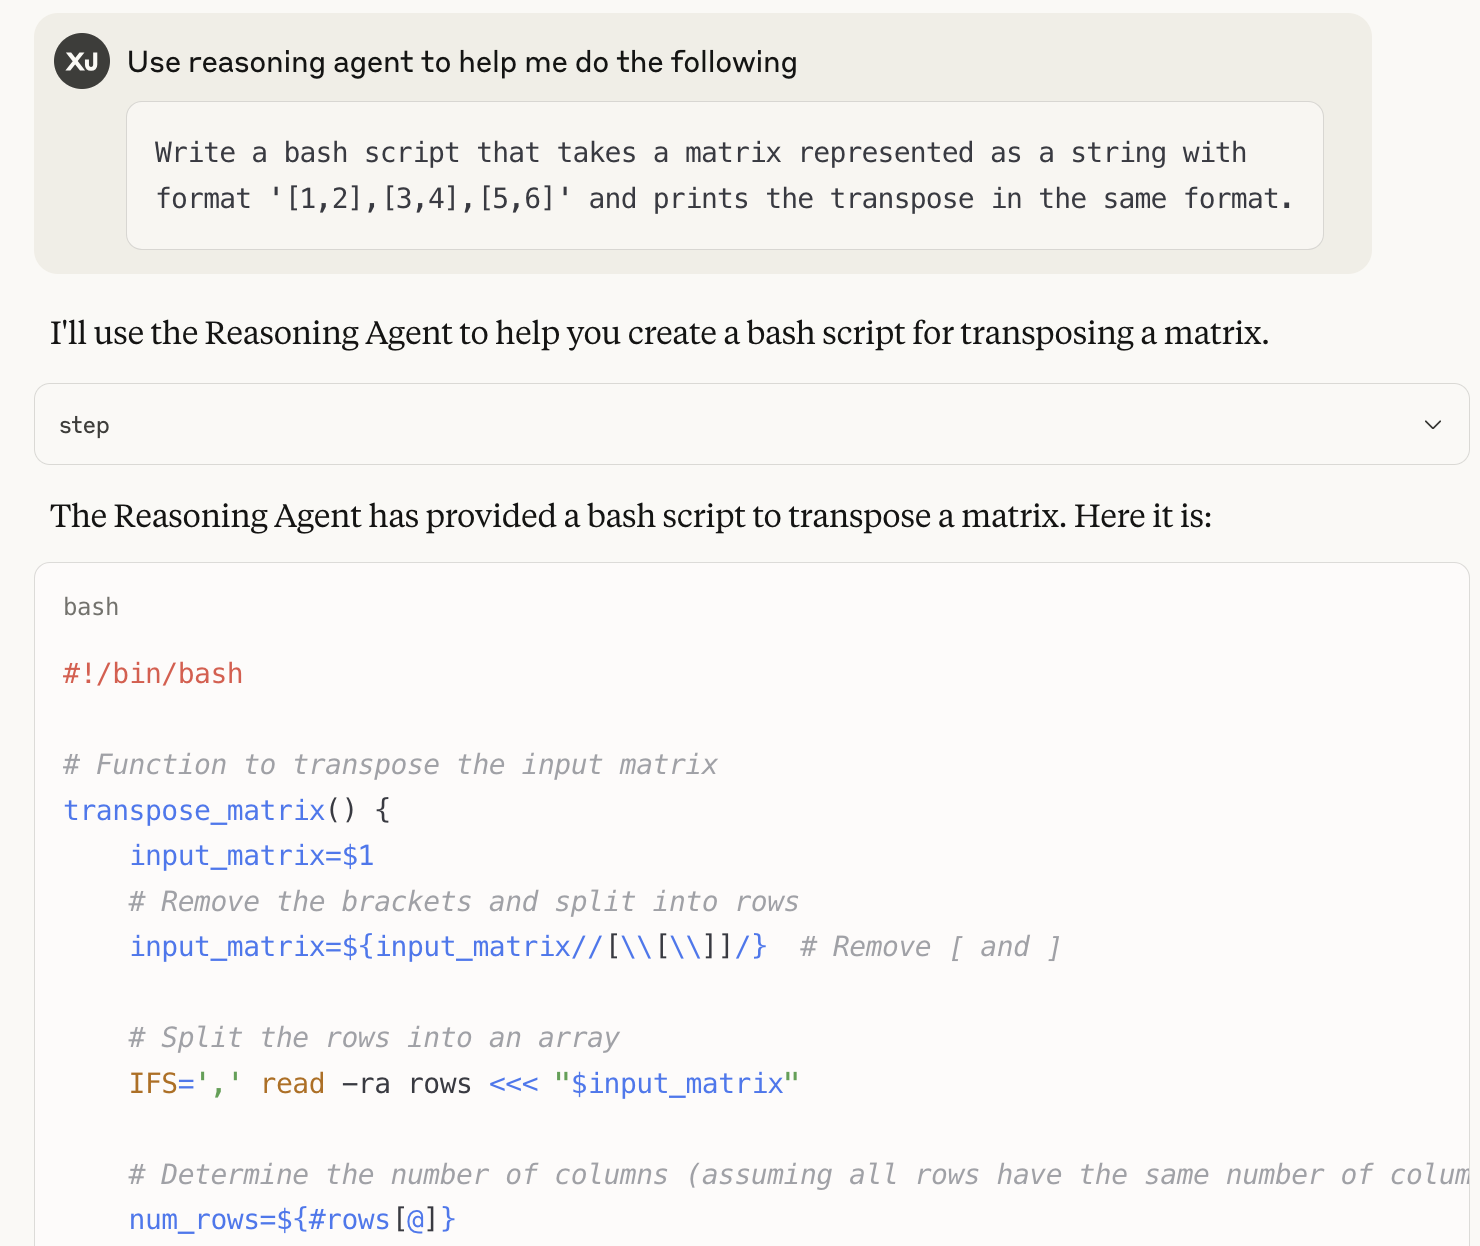

### Ongoing MCP Developments

- **MCP Search Agents**: Integration with additional MCP registries, e.g., ACI.dev, Composio
- **MCP Hub**: Hosting and validating our own repository of MCP servers
- **Role-Playing/Workforce as MCP Servers**: Transforming CAMEL's multi-agent module into MCP servers

## 🌟 Highlights

This notebook has guided you through the MCP related functions and modules in CAMEL, including:

- Agent using MCP servers
- Convert tools into MCP servers
- MCP search toolkits / agents
- Agent as MCP servers

In the future, we will have more MCP features coming!!

That's everything: Got questions about 🐫 CAMEL-AI? Join us on [Discord](https://discord.camel-ai.org)! Whether you want to share feedback, explore the latest in multi-agent systems, get support, or connect with others on exciting projects, we’d love to have you in the community! 🤝

Check out some of our other work:

1. 🐫 Creating Your First CAMEL Agent [free Colab](https://docs.camel-ai.org/cookbooks/create_your_first_agent.html)

2.  Graph RAG Cookbook [free Colab](https://colab.research.google.com/drive/1uZKQSuu0qW6ukkuSv9TukLB9bVaS1H0U?usp=sharing)

3. 🧑‍⚖️ Create A Hackathon Judge Committee with Workforce [free Colab](https://colab.research.google.com/drive/18ajYUMfwDx3WyrjHow3EvUMpKQDcrLtr?usp=sharing)

4. 🔥 3 ways to ingest data from websites with Firecrawl & CAMEL [free Colab](https://colab.research.google.com/drive/1lOmM3VmgR1hLwDKdeLGFve_75RFW0R9I?usp=sharing)

5. 🦥 Agentic SFT Data Generation with CAMEL and Mistral Models, Fine-Tuned with Unsloth [free Colab](https://colab.research.google.com/drive/1lYgArBw7ARVPSpdwgKLYnp_NEXiNDOd-?usp=sharingg)

Thanks from everyone at 🐫 CAMEL-AI


<div class="align-center">
  <a href="https://www.camel-ai.org/"><img src="https://i.postimg.cc/KzQ5rfBC/button.png"width="150"></a>
  <a href="https://discord.camel-ai.org"><img src="https://i.postimg.cc/L4wPdG9N/join-2.png"  width="150"></a></a>
  
⭐ <i>Star us on [*Github*](https://github.com/camel-ai/camel), join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)
</div>
